In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import json



In [9]:
def get_type_error_df(stats, type_error, cutoff = 0.05, aso_cutoff = 0.2):
    #for each sample size, calculate the type 1 error rate in stats for each test
    type_error_dict = {
        5: [],
        10: [],
        15: [],
        20: []
    }

    for key in stats.keys():
        for j in range(0, 6):
            count = 0
            for k in range(0, 100):
                if(type_error == 1):

                    if j == 0:
                        if stats[key][j][k] < aso_cutoff:
                            count += 1
                    else:
                        if stats[key][j][k] < cutoff:
                            count += 1
                elif(type_error == 2):
                    if j == 0:
                        if stats[key][j][k] > aso_cutoff:
                            count += 1
                    else:
                        if stats[key][j][k] > cutoff:
                            count += 1   
            type_error_dict[int(key)].append(count/100) 

    #restructure data for line plotting
    type_error_dict = pd.DataFrame(type_error_dict)
    type_error_dict = type_error_dict.transpose()
    type_error_dict.columns = ["ASO", "Student's t", "Bootstrap", "Permutation", "Wilcoxon", "Mann-Whitney U"]
    type_error_dict = type_error_dict.reset_index()
    type_error_dict = type_error_dict.rename(columns = {"index": "Sample Size"})
    type_error_dict = type_error_dict.melt(id_vars = ["Sample Size"], var_name = "Test", value_name = f"Type {type_error} Error Rate")

    
    return type_error_dict

In [10]:
def plot_type_error(stats, distribution = "Normal", type_error = 1, save=False):

    type_error_df = get_type_error_df(stats, type_error)

    #plot type 1 error rate and change x ticks by sample size with seaborn

    import seaborn as sns
    sns.set_theme(style="whitegrid")
    ax = sns.lineplot(x="Sample Size", y=f"Type {type_error} Error Rate", hue="Test", data=type_error_df)
    ax.set_title(f"Type {type_error} Error Rate from {distribution} Distribution")
    ax.set(xlabel='Sample Size', ylabel=f'Type {type_error} Error Rate')
    ax.set_xticks([5, 10, 15, 20])
    if(save):
        plt.savefig(f"type_{type_error}_error_{distribution}.png")
    


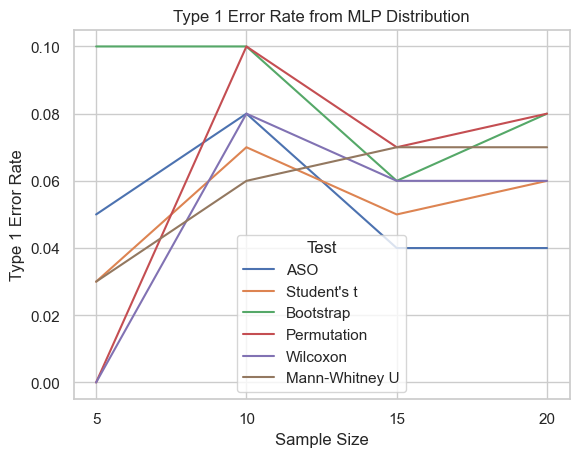

In [44]:
#load pickle file
import pickle
with open("mlp_same_model_output.pkl", "rb") as f:
    stats = pickle.load(f)
plot_type_error(stats, distribution = "MLP", type_error = 1, save=True)

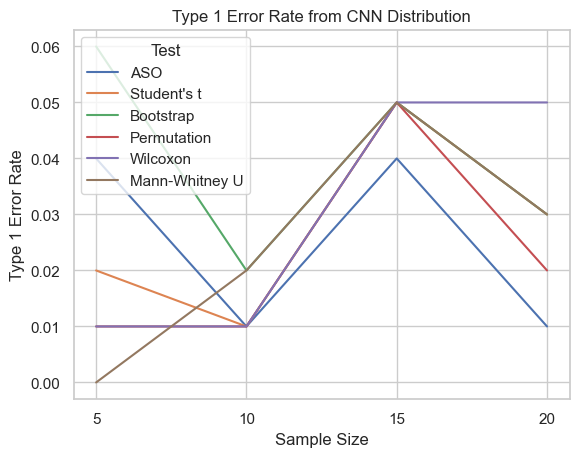

In [28]:
#read in stats_normal.json

with open('data/CNN_TYPE_1.json') as json_file:
    stats = json.load(json_file)

plot_type_error(stats, distribution = "CNN", type_error = 1, save=True)

In [38]:
with open('data/CNN_TYPE_1.json') as json_file:
    stats = json.load(json_file)


In [45]:
thresholds = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
table = []
for threshold in thresholds:
    #create tables for different cuttoffs
    type_error_df = get_type_error_df(stats, type_error = 1, cutoff = threshold, aso_cutoff=threshold)
    type_error_df = type_error_df.pivot(index='Sample Size', columns='Test', values='Type 1 Error Rate')
    #type_error_df = type_error_df.reset_index()
    type_error_df['Threshold'] = threshold
    table.append(type_error_df)
    
table_df = pd.concat(table)


In [46]:
#sort by sample size and threshold
table_df = table_df.sort_values(by=['Sample Size', 'Threshold'])
#switch the order of the columns so that threshold is second
cols = table_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
table_df = table_df[cols]

In [47]:
display(table_df)

Test,Threshold,ASO,Bootstrap,Mann-Whitney U,Permutation,Student's t,Wilcoxon
Sample Size,,,,,,,
5,0.05,0.00,0.10,0.03,0.00,0.03,0.00
5,0.10,0.03,0.13,0.06,0.05,0.10,0.08
5,0.20,0.05,0.29,0.17,0.21,0.22,0.16
5,0.30,0.11,0.37,0.32,0.31,0.35,0.23
5,0.40,0.14,0.47,0.44,0.42,0.46,0.34
5,0.50,0.18,0.51,0.46,0.51,0.51,0.41
10,0.05,0.03,0.10,0.06,0.10,0.07,0.08
10,0.10,0.04,0.16,0.13,0.16,0.15,0.15
10,0.20,0.08,0.31,0.26,0.26,0.30,0.25


# Save table image